In [1]:
#!pip install imutils

In [2]:
# ! pip install keras
# ! pip install tensorflow

In [3]:
# pip install opencv-contrib-python

# Importing libraries

In [4]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers as L

# Reading training data

In [5]:
dir =  r"C:\Users\w20027087\Downloads\archive\dataset\Train"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in tqdm(os.listdir(dir)):
    print(os.listdir(dir))
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    print(sub_directory)
    for j in os.listdir(sub_directory):
        print(j,type(j))
        count+=1
        if count > 2000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

  0%|                                                                                           | 0/39 [00:00<?, ?it/s]

['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\0
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
10000.jpg <class 'str'>
10001.jpg <class 'str'>
10002.jpg

 10%|████████▌                                                                          | 4/39 [00:10<01:33,  2.67s/it]

11847.jpg <class 'str'>
11848.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\1
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
10000.jpg <class 'str'>
10001.jpg <class 'str'>
10002.jpg <class 'str'>
10003.jpg <class 'str'>
10004.jpg <class 'str'>
10005.jpg <class 'str'>
10006.jpg <class 'str'>
10007.jpg <class 'str'>
10008.jpg <class 'str'>
10009.jpg <class 'str'>
1001.jpg <class 'str'>
10010.jpg <class 'str'>
10011.jpg <class 'str'>
10012.jpg <class 'str'>
10013.jpg <class 'str'>
10014.jpg <class 'str'>
10015.jpg <class 'str'>
10016.jpg <class 'str'>
10017.jpg <class 'str'>
10018.jpg <class 'str'>
10019.jpg <class 'str'>
1002.jpg <class 'str'>
10020.jpg <class 'str'>
10021.jpg <class 'str'>
10022.jpg <class 'str'>

 13%|██████████▋                                                                        | 5/39 [00:19<02:31,  4.47s/it]

11833.jpg <class 'str'>
11834.jpg <class 'str'>
11835.jpg <class 'str'>
11836.jpg <class 'str'>
11837.jpg <class 'str'>
11838.jpg <class 'str'>
11839.jpg <class 'str'>
1184.jpg <class 'str'>
11840.jpg <class 'str'>
11841.jpg <class 'str'>
11842.jpg <class 'str'>
11843.jpg <class 'str'>
11844.jpg <class 'str'>
11845.jpg <class 'str'>
11846.jpg <class 'str'>
11847.jpg <class 'str'>
11848.jpg <class 'str'>
11849.jpg <class 'str'>
1185.jpg <class 'str'>
11850.jpg <class 'str'>
11852.jpg <class 'str'>
11853.jpg <class 'str'>
11854.jpg <class 'str'>
11855.jpg <class 'str'>
11856.jpg <class 'str'>
11857.jpg <class 'str'>
11858.jpg <class 'str'>
11859.jpg <class 'str'>
1186.jpg <class 'str'>
11860.jpg <class 'str'>
11861.jpg <class 'str'>
11862.jpg <class 'str'>
11863.jpg <class 'str'>
11864.jpg <class 'str'>
11867.jpg <class 'str'>
11868.jpg <class 'str'>
11869.jpg <class 'str'>
1187.jpg <class 'str'>
11870.jpg <class 'str'>
11872.jpg <class 'str'>
11873.jpg <class 'str'>
11874.jpg <class 'st

 15%|████████████▊                                                                      | 6/39 [00:29<03:23,  6.15s/it]

 <class 'str'>
11856.jpg <class 'str'>
11857.jpg <class 'str'>
11858.jpg <class 'str'>
11859.jpg <class 'str'>
1186.jpg <class 'str'>
11860.jpg <class 'str'>
11861.jpg <class 'str'>
11862.jpg <class 'str'>
11863.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\3
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
10000.jpg <class 'str'>
10001.jpg <class 'str'>
10002.jpg <class 'str'>
10003.jpg <class 'str'>
10004.jpg <class 'str'>
10005.jpg <class 'str'>
10006.jpg <class 'str'>
10007.jpg <class 'str'>
10008.jpg <class 'str'>
10009.jpg <class 'str'>
1001.jpg <class 'str'>
10010.jpg <class 'str'>
10011.jpg <class 'str'>
10012.jpg <class 'str'>
10013.jpg <class 'str'>
10015.jpg <class 'str'>
10017.jpg <class 'str'>
10018.jp

 18%|██████████████▉                                                                    | 7/39 [00:38<03:44,  7.01s/it]

 <class 'str'>
11830.jpg <class 'str'>
11831.jpg <class 'str'>
11832.jpg <class 'str'>
11833.jpg <class 'str'>
11834.jpg <class 'str'>
11835.jpg <class 'str'>
11836.jpg <class 'str'>
11837.jpg <class 'str'>
11838.jpg <class 'str'>
11839.jpg <class 'str'>
1184.jpg <class 'str'>
11840.jpg <class 'str'>
11841.jpg <class 'str'>
11842.jpg <class 'str'>
11843.jpg <class 'str'>
11844.jpg <class 'str'>
11845.jpg <class 'str'>
11846.jpg <class 'str'>
11847.jpg <class 'str'>
11848.jpg <class 'str'>
11849.jpg <class 'str'>
1185.jpg <class 'str'>
11850.jpg <class 'str'>
11852.jpg <class 'str'>
11853.jpg <class 'str'>
11854.jpg <class 'str'>
11855.jpg <class 'str'>
11857.jpg <class 'str'>
11858.jpg <class 'str'>
11859.jpg <class 'str'>
1186.jpg <class 'str'>
11860.jpg <class 'str'>
11861.jpg <class 'str'>
11862.jpg <class 'str'>
11863.jpg <class 'str'>
11864.jpg <class 'str'>
11865.jpg <class 'str'>
11866.jpg <class 'str'>
11867.jpg <class 'str'>
11868.jpg <class 'str'>
11869.jpg <class 'str'>
1187

 21%|█████████████████                                                                  | 8/39 [00:46<03:49,  7.42s/it]

11821.jpg <class 'str'>
11822.jpg <class 'str'>
11823.jpg <class 'str'>
11824.jpg <class 'str'>
11825.jpg <class 'str'>
11826.jpg <class 'str'>
11827.jpg <class 'str'>
11828.jpg <class 'str'>
11829.jpg <class 'str'>
1183.jpg <class 'str'>
11830.jpg <class 'str'>
11831.jpg <class 'str'>
11832.jpg <class 'str'>
11833.jpg <class 'str'>
11834.jpg <class 'str'>
11835.jpg <class 'str'>
11836.jpg <class 'str'>
11837.jpg <class 'str'>
11838.jpg <class 'str'>
11839.jpg <class 'str'>
1184.jpg <class 'str'>
11840.jpg <class 'str'>
11841.jpg <class 'str'>
11842.jpg <class 'str'>
11843.jpg <class 'str'>
11844.jpg <class 'str'>
11845.jpg <class 'str'>
11846.jpg <class 'str'>
11847.jpg <class 'str'>
11848.jpg <class 'str'>
1185.jpg <class 'str'>
11850.jpg <class 'str'>
11851.jpg <class 'str'>
11852.jpg <class 'str'>
11854.jpg <class 'str'>
11855.jpg <class 'str'>
11856.jpg <class 'str'>
11857.jpg <class 'str'>
11858.jpg <class 'str'>
11859.jpg <class 'str'>
1186.jpg <class 'str'>
11860.jpg <class 'st

 23%|███████████████████▏                                                               | 9/39 [00:56<04:04,  8.16s/it]

1208.jpg <class 'str'>
12083.jpg <class 'str'>
12086.jpg <class 'str'>
12087.jpg <class 'str'>
12088.jpg <class 'str'>
12089.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\6
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
10000.jpg <class 'str'>
10001.jpg <class 'str'>
10002.jpg <class 'str'>
10003.jpg <class 'str'>
10004.jpg <class 'str'>
10005.jpg <class 'str'>
10006.jpg <class 'str'>
10007.jpg <class 'str'>
10008.jpg <class 'str'>
10009.jpg <class 'str'>
1001.jpg <class 'str'>
10010.jpg <class 'str'>
10011.jpg <class 'str'>
10012.jpg <class 'str'>
10013.jpg <class 'str'>
10014.jpg <class 'str'>
10015.jpg <class 'str'>
10016.jpg <class 'str'>
10017.jpg <class 'str'>
10018.jpg <class 'str'>
10019.jpg <class 'str'>

 26%|█████████████████████                                                             | 10/39 [01:11<04:50, 10.01s/it]

11847.jpg <class 'str'>
11848.jpg <class 'str'>
11849.jpg <class 'str'>
1185.jpg <class 'str'>
11850.jpg <class 'str'>
11851.jpg <class 'str'>
11853.jpg <class 'str'>
11854.jpg <class 'str'>
11855.jpg <class 'str'>
11856.jpg <class 'str'>
11857.jpg <class 'str'>
11858.jpg <class 'str'>
11859.jpg <class 'str'>
1186.jpg <class 'str'>
11860.jpg <class 'str'>
11861.jpg <class 'str'>
11862.jpg <class 'str'>
11863.jpg <class 'str'>
11864.jpg <class 'str'>
11865.jpg <class 'str'>
11866.jpg <class 'str'>
11867.jpg <class 'str'>
11868.jpg <class 'str'>
11869.jpg <class 'str'>
1187.jpg <class 'str'>
11870.jpg <class 'str'>
11872.jpg <class 'str'>
11873.jpg <class 'str'>
11874.jpg <class 'str'>
11875.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\7
0.jpg <class 'str'>
1.jpg <class '

 28%|███████████████████████▏                                                          | 11/39 [01:20<04:32,  9.74s/it]

11819.jpg <class 'str'>
1182.jpg <class 'str'>
11820.jpg <class 'str'>
11821.jpg <class 'str'>
11822.jpg <class 'str'>
11823.jpg <class 'str'>
11824.jpg <class 'str'>
11825.jpg <class 'str'>
11826.jpg <class 'str'>
11827.jpg <class 'str'>
11828.jpg <class 'str'>
11829.jpg <class 'str'>
11830.jpg <class 'str'>
11831.jpg <class 'str'>
11832.jpg <class 'str'>
11833.jpg <class 'str'>
11834.jpg <class 'str'>
11835.jpg <class 'str'>
11836.jpg <class 'str'>
11837.jpg <class 'str'>
11838.jpg <class 'str'>
11839.jpg <class 'str'>
1184.jpg <class 'str'>
11840.jpg <class 'str'>
11841.jpg <class 'str'>
11842.jpg <class 'str'>
11843.jpg <class 'str'>
11844.jpg <class 'str'>
11845.jpg <class 'str'>
11846.jpg <class 'str'>
11847.jpg <class 'str'>
11848.jpg <class 'str'>
11849.jpg <class 'str'>
1185.jpg <class 'str'>
11850.jpg <class 'str'>
11851.jpg <class 'str'>
11852.jpg <class 'str'>
11853.jpg <class 'str'>
11854.jpg <class 'str'>
11855.jpg <class 'str'>
11856.jpg <class 'str'>
11857.jpg <class 's

 31%|█████████████████████████▏                                                        | 12/39 [01:30<04:30, 10.02s/it]

11837.jpg <class 'str'>
11838.jpg <class 'str'>
11839.jpg <class 'str'>
1184.jpg <class 'str'>
11840.jpg <class 'str'>
11841.jpg <class 'str'>
11842.jpg <class 'str'>
11843.jpg <class 'str'>
11844.jpg <class 'str'>
11845.jpg <class 'str'>
11846.jpg <class 'str'>
11847.jpg <class 'str'>
11848.jpg <class 'str'>
11849.jpg <class 'str'>
1185.jpg <class 'str'>
11850.jpg <class 'str'>
11851.jpg <class 'str'>
11852.jpg <class 'str'>
11853.jpg <class 'str'>
11854.jpg <class 'str'>
11855.jpg <class 'str'>
11856.jpg <class 'str'>
11857.jpg <class 'str'>
11858.jpg <class 'str'>
11859.jpg <class 'str'>
1186.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\9
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
10000.jpg <class 'str'>
10001.jpg <class 'str'>

 33%|███████████████████████████▎                                                      | 13/39 [01:39<04:11,  9.67s/it]

11884.jpg <class 'str'>
11885.jpg <class 'str'>
11886.jpg <class 'str'>
11887.jpg <class 'str'>
11888.jpg <class 'str'>
11889.jpg <class 'str'>
1189.jpg <class 'str'>
11890.jpg <class 'str'>
11891.jpg <class 'str'>
11892.jpg <class 'str'>
11893.jpg <class 'str'>
11894.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\A
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1005.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 's

 38%|███████████████████████████████▌                                                  | 15/39 [01:45<03:02,  7.60s/it]

 <class 'str'>
2757.jpg <class 'str'>
2758.jpg <class 'str'>
2759.jpg <class 'str'>
276.jpg <class 'str'>
2760.jpg <class 'str'>
2761.jpg <class 'str'>
2762.jpg <class 'str'>
2763.jpg <class 'str'>
2764.jpg <class 'str'>
2765.jpg <class 'str'>
2766.jpg <class 'str'>
2767.jpg <class 'str'>
2768.jpg <class 'str'>
2769.jpg <class 'str'>
277.jpg <class 'str'>
2770.jpg <class 'str'>
2771.jpg <class 'str'>
2772.jpg <class 'str'>
2773.jpg <class 'str'>
2774.jpg <class 'str'>
2775.jpg <class 'str'>
2776.jpg <class 'str'>
2777.jpg <class 'str'>
2778.jpg <class 'str'>
2779.jpg <class 'str'>
278.jpg <class 'str'>
2780.jpg <class 'str'>
2781.jpg <class 'str'>
2782.jpg <class 'str'>
2783.jpg <class 'str'>
2784.jpg <class 'str'>
2785.jpg <class 'str'>
2786.jpg <class 'str'>
2787.jpg <class 'str'>
2788.jpg <class 'str'>
2789.jpg <class 'str'>
279.jpg <class 'str'>
2790.jpg <class 'str'>
2791.jpg <class 'str'>
2792.jpg <class 'str'>
2793.jpg <class 'str'>
2794.jpg <class 'str'>
2795.jpg <class 'str'>


 41%|█████████████████████████████████▋                                                | 16/39 [01:48<02:25,  6.33s/it]

2808.jpg <class 'str'>
2809.jpg <class 'str'>
281.jpg <class 'str'>
2810.jpg <class 'str'>
2811.jpg <class 'str'>
2812.jpg <class 'str'>
2813.jpg <class 'str'>
2814.jpg <class 'str'>
2816.jpg <class 'str'>
2817.jpg <class 'str'>
2818.jpg <class 'str'>
2819.jpg <class 'str'>
282.jpg <class 'str'>
2820.jpg <class 'str'>
2821.jpg <class 'str'>
2823.jpg <class 'str'>
2824.jpg <class 'str'>
2825.jpg <class 'str'>
2826.jpg <class 'str'>
2827.jpg <class 'str'>
2829.jpg <class 'str'>
283.jpg <class 'str'>
2830.jpg <class 'str'>
2832.jpg <class 'str'>
2833.jpg <class 'str'>
2834.jpg <class 'str'>
2835.jpg <class 'str'>
2836.jpg <class 'str'>
2837.jpg <class 'str'>
2838.jpg <class 'str'>
2839.jpg <class 'str'>
284.jpg <class 'str'>
2840.jpg <class 'str'>
2841.jpg <class 'str'>
2842.jpg <class 'str'>
2843.jpg <class 'str'>
2844.jpg <class 'str'>
2845.jpg <class 'str'>
2846.jpg <class 'str'>
2847.jpg <class 'str'>
2848.jpg <class 'str'>
2849.jpg <class 'str'>
285.jpg <class 'str'>
2850.jpg <class 

 44%|███████████████████████████████████▋                                              | 17/39 [01:52<02:00,  5.47s/it]

1185.jpg <class 'str'>
11850.jpg <class 'str'>
11851.jpg <class 'str'>
11852.jpg <class 'str'>
11853.jpg <class 'str'>
11854.jpg <class 'str'>
11855.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\D
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1007.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1011.jpg <class 'str'>
1012.jpg <class 'str'>
1014.jpg <class 'str'>
1015.jpg <class 'str'>
1016.jpg <class 'str'>
1017.jpg <class 'str'>
1018.jpg <class 'str'>
1019.jpg <class 'str'>
102.jpg <class 'str'>
1020.jpg <class 'str'>
1021.jpg <class 'str'>
1022.jpg <class 'str

 46%|█████████████████████████████████████▊                                            | 18/39 [01:55<01:41,  4.83s/it]

2743.jpg <class 'str'>
2744.jpg <class 'str'>
2745.jpg <class 'str'>
2746.jpg <class 'str'>
2747.jpg <class 'str'>
2748.jpg <class 'str'>
2749.jpg <class 'str'>
275.jpg <class 'str'>
2750.jpg <class 'str'>
2751.jpg <class 'str'>
2752.jpg <class 'str'>
2753.jpg <class 'str'>
2754.jpg <class 'str'>
2755.jpg <class 'str'>
2756.jpg <class 'str'>
2757.jpg <class 'str'>
2758.jpg <class 'str'>
2759.jpg <class 'str'>
276.jpg <class 'str'>
2760.jpg <class 'str'>
2761.jpg <class 'str'>
2762.jpg <class 'str'>
2763.jpg <class 'str'>
2764.jpg <class 'str'>
2765.jpg <class 'str'>
2766.jpg <class 'str'>
2767.jpg <class 'str'>
2768.jpg <class 'str'>
2769.jpg <class 'str'>
277.jpg <class 'str'>
2770.jpg <class 'str'>
2771.jpg <class 'str'>
2772.jpg <class 'str'>
2773.jpg <class 'str'>
2774.jpg <class 'str'>
2775.jpg <class 'str'>
2776.jpg <class 'str'>
2777.jpg <class 'str'>
2778.jpg <class 'str'>
2779.jpg <class 'str'>
278.jpg <class 'str'>
2780.jpg <class 'str'>
2781.jpg <class 'str'>
2782.jpg <class

 49%|███████████████████████████████████████▉                                          | 19/39 [02:08<02:26,  7.32s/it]

2859.jpg <class 'str'>
286.jpg <class 'str'>
2860.jpg <class 'str'>
2861.jpg <class 'str'>
2862.jpg <class 'str'>
2863.jpg <class 'str'>
2864.jpg <class 'str'>
2865.jpg <class 'str'>
2866.jpg <class 'str'>
2867.jpg <class 'str'>
2868.jpg <class 'str'>
2869.jpg <class 'str'>
287.jpg <class 'str'>
2870.jpg <class 'str'>
2871.jpg <class 'str'>
2872.jpg <class 'str'>
2873.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\F
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1005.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1011

 51%|██████████████████████████████████████████                                        | 20/39 [02:20<02:47,  8.84s/it]

2817.jpg <class 'str'>
2818.jpg <class 'str'>
2819.jpg <class 'str'>
282.jpg <class 'str'>
2820.jpg <class 'str'>
2821.jpg <class 'str'>
2824.jpg <class 'str'>
2825.jpg <class 'str'>
2827.jpg <class 'str'>
2829.jpg <class 'str'>
283.jpg <class 'str'>
2831.jpg <class 'str'>
2832.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\G
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1005.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1011.jpg <class 'str'>
1012.jpg <class 'str'>
1013.jpg <class 'str'>
1014.jpg <class 'str'>
1015.jpg <class 'str'>
1016.jpg <class 'str'>
1

 54%|████████████████████████████████████████████▏                                     | 21/39 [02:32<02:56,  9.80s/it]

 <class 'str'>
851.jpg <class 'str'>
852.jpg <class 'str'>
853.jpg <class 'str'>
854.jpg <class 'str'>
855.jpg <class 'str'>
856.jpg <class 'str'>
857.jpg <class 'str'>
858.jpg <class 'str'>
859.jpg <class 'str'>
86.jpg <class 'str'>
860.jpg <class 'str'>
861.jpg <class 'str'>
862.jpg <class 'str'>
863.jpg <class 'str'>
864.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\H
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1011.jpg <class 'str'>
1012.jpg <class 'str'>
1013.jpg <class 'str'>
1014.jpg <class 'str'>
1015.jpg <class 'str'>
101

 56%|██████████████████████████████████████████████▎                                   | 22/39 [02:44<02:56, 10.36s/it]

 <class 'str'>
2870.jpg <class 'str'>
2871.jpg <class 'str'>
2872.jpg <class 'str'>
2873.jpg <class 'str'>
2874.jpg <class 'str'>
2875.jpg <class 'str'>
2876.jpg <class 'str'>
2877.jpg <class 'str'>
2878.jpg <class 'str'>
2879.jpg <class 'str'>
288.jpg <class 'str'>
2880.jpg <class 'str'>
2881.jpg <class 'str'>
2882.jpg <class 'str'>
2883.jpg <class 'str'>
2884.jpg <class 'str'>
2885.jpg <class 'str'>
2886.jpg <class 'str'>
2887.jpg <class 'str'>
2888.jpg <class 'str'>
2889.jpg <class 'str'>
289.jpg <class 'str'>
2890.jpg <class 'str'>
2891.jpg <class 'str'>
2892.jpg <class 'str'>
2893.jpg <class 'str'>
2894.jpg <class 'str'>
2895.jpg <class 'str'>
2896.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\I
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <c

 59%|████████████████████████████████████████████████▎                                 | 23/39 [02:57<02:55, 10.99s/it]

11863.jpg <class 'str'>
11864.jpg <class 'str'>
11865.jpg <class 'str'>
11866.jpg <class 'str'>
11867.jpg <class 'str'>
11868.jpg <class 'str'>
11869.jpg <class 'str'>
1187.jpg <class 'str'>
11870.jpg <class 'str'>
11871.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\J
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1011.jpg <class 'str'>
1012.jpg <class 'str'>
1013.jpg <class 'str'>
1014.jpg <class 'str'>
1016.jpg <class 'str'>
1017.jpg <class 'str'>
1018.jpg <class 'str'>
1019.jpg <class 

 62%|██████████████████████████████████████████████████▍                               | 24/39 [03:17<03:27, 13.86s/it]

289.jpg <class 'str'>
2890.jpg <class 'str'>
2891.jpg <class 'str'>
2892.jpg <class 'str'>
2893.jpg <class 'str'>
2894.jpg <class 'str'>
2895.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\K
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1005.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1011.jpg <class 'str'>
1012.jpg <class 'str'>
1013.jpg <class 'str'>
1014.jpg <class 'str'>
1015.jpg <class 'str'>
1016.jpg <class 'str'>
1017.jpg <class 'str'>
1018.jpg <class 'str'>
1019.jpg <class 'str'>
102.jpg <class 'str'>
1020

 64%|████████████████████████████████████████████████████▌                             | 25/39 [03:34<03:26, 14.72s/it]

2882.jpg <class 'str'>
2883.jpg <class 'str'>
2884.jpg <class 'str'>
2885.jpg <class 'str'>
2886.jpg <class 'str'>
2887.jpg <class 'str'>
2889.jpg <class 'str'>
289.jpg <class 'str'>
2890.jpg <class 'str'>
2891.jpg <class 'str'>
2893.jpg <class 'str'>
2894.jpg <class 'str'>
2895.jpg <class 'str'>
2896.jpg <class 'str'>
2897.jpg <class 'str'>
2898.jpg <class 'str'>
2899.jpg <class 'str'>
29.jpg <class 'str'>
290.jpg <class 'str'>
2900.jpg <class 'str'>
2901.jpg <class 'str'>
2902.jpg <class 'str'>
2903.jpg <class 'str'>
2904.jpg <class 'str'>
2905.jpg <class 'str'>
2906.jpg <class 'str'>
2907.jpg <class 'str'>
2908.jpg <class 'str'>
2909.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\L
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.

 67%|██████████████████████████████████████████████████████▋                           | 26/39 [03:45<02:56, 13.55s/it]

11788.jpg <class 'str'>
11789.jpg <class 'str'>
11790.jpg <class 'str'>
11791.jpg <class 'str'>
11792.jpg <class 'str'>
11793.jpg <class 'str'>
11794.jpg <class 'str'>
11795.jpg <class 'str'>
11796.jpg <class 'str'>
11797.jpg <class 'str'>
11798.jpg <class 'str'>
11799.jpg <class 'str'>
118.jpg <class 'str'>
1180.jpg <class 'str'>
11800.jpg <class 'str'>
11801.jpg <class 'str'>
11802.jpg <class 'str'>
11803.jpg <class 'str'>
11804.jpg <class 'str'>
11805.jpg <class 'str'>
11806.jpg <class 'str'>
11807.jpg <class 'str'>
11808.jpg <class 'str'>
11809.jpg <class 'str'>
1181.jpg <class 'str'>
11810.jpg <class 'str'>
11811.jpg <class 'str'>
11812.jpg <class 'str'>
11813.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\M
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'

 69%|████████████████████████████████████████████████████████▊                         | 27/39 [03:57<02:39, 13.33s/it]

11826.jpg <class 'str'>
11827.jpg <class 'str'>
11828.jpg <class 'str'>
11829.jpg <class 'str'>
1183.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\N
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
10000.jpg <class 'str'>
10001.jpg <class 'str'>
10002.jpg <class 'str'>
10003.jpg <class 'str'>
10004.jpg <class 'str'>
10005.jpg <class 'str'>
10006.jpg <class 'str'>
10007.jpg <class 'str'>
10008.jpg <class 'str'>
10009.jpg <class 'str'>
1001.jpg <class 'str'>
10010.jpg <class 'str'>
10011.jpg <class 'str'>
10012.jpg <class 'str'>
10013.jpg <class 'str'>
10014.jpg <class 'str'>
10015.jpg <class 'str'>
10016.jpg <class 'str'>
10017.jpg <class 'str'>
10018.jpg <class 'str'>
10019.jpg <class 'str'>
1002.jpg <class 'str'>


 72%|██████████████████████████████████████████████████████████▊                       | 28/39 [04:06<02:11, 11.91s/it]

 <class 'str'>
11757.jpg <class 'str'>
11758.jpg <class 'str'>
11759.jpg <class 'str'>
1176.jpg <class 'str'>
11760.jpg <class 'str'>
11761.jpg <class 'str'>
11762.jpg <class 'str'>
11763.jpg <class 'str'>
11764.jpg <class 'str'>
11765.jpg <class 'str'>
11766.jpg <class 'str'>
11767.jpg <class 'str'>
11768.jpg <class 'str'>
11769.jpg <class 'str'>
1177.jpg <class 'str'>
11770.jpg <class 'str'>
11771.jpg <class 'str'>
11772.jpg <class 'str'>
11773.jpg <class 'str'>
11774.jpg <class 'str'>
11775.jpg <class 'str'>
11776.jpg <class 'str'>
11777.jpg <class 'str'>
11778.jpg <class 'str'>
11779.jpg <class 'str'>
1178.jpg <class 'str'>
11780.jpg <class 'str'>
11781.jpg <class 'str'>
11782.jpg <class 'str'>
11783.jpg <class 'str'>
11784.jpg <class 'str'>
11785.jpg <class 'str'>
11786.jpg <class 'str'>
11787.jpg <class 'str'>
11788.jpg <class 'str'>
11789.jpg <class 'str'>
1179.jpg <class 'str'>
11790.jpg <class 'str'>
11791.jpg <class 'str'>
11792.jpg <class 'str'>
11793.jpg <class 'str'>
11794

 74%|████████████████████████████████████████████████████████████▉                     | 29/39 [04:15<01:49, 10.99s/it]

 <class 'str'>
1641.jpg <class 'str'>
1642.jpg <class 'str'>
1643.jpg <class 'str'>
1644.jpg <class 'str'>
1645.jpg <class 'str'>
1646.jpg <class 'str'>
1647.jpg <class 'str'>
1648.jpg <class 'str'>
1649.jpg <class 'str'>
165.jpg <class 'str'>
1650.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\Q
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1004.jpg <class 'str'>
1005.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1011.jpg <class 'str'>
1012.jpg <class 'str'>
1013.jpg <class 'str'>
1014.jpg <class 'str'>
1015.jpg <class 'str'>
1016.jpg <class 'str'>
1017.jpg <c

 77%|███████████████████████████████████████████████████████████████                   | 30/39 [04:36<02:07, 14.15s/it]

 <class 'str'>
914.jpg <class 'str'>
916.jpg <class 'str'>
917.jpg <class 'str'>
918.jpg <class 'str'>
919.jpg <class 'str'>
92.jpg <class 'str'>
920.jpg <class 'str'>
922.jpg <class 'str'>
923.jpg <class 'str'>
924.jpg <class 'str'>
925.jpg <class 'str'>
926.jpg <class 'str'>
927.jpg <class 'str'>
928.jpg <class 'str'>
929.jpg <class 'str'>
93.jpg <class 'str'>
930.jpg <class 'str'>
931.jpg <class 'str'>
932.jpg <class 'str'>
933.jpg <class 'str'>
934.jpg <class 'str'>
936.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\R
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1005.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <

 79%|█████████████████████████████████████████████████████████████████▏                | 31/39 [04:56<02:07, 15.90s/it]

 <class 'str'>
2836.jpg <class 'str'>
2837.jpg <class 'str'>
2838.jpg <class 'str'>
2839.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\S
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
10000.jpg <class 'str'>
10001.jpg <class 'str'>
10002.jpg <class 'str'>
10003.jpg <class 'str'>
10004.jpg <class 'str'>
10005.jpg <class 'str'>
10006.jpg <class 'str'>
10007.jpg <class 'str'>
10008.jpg <class 'str'>
10009.jpg <class 'str'>
1001.jpg <class 'str'>
10010.jpg <class 'str'>
10011.jpg <class 'str'>
10012.jpg <class 'str'>
10013.jpg <class 'str'>
10014.jpg <class 'str'>
10015.jpg <class 'str'>
10016.jpg <class 'str'>
10017.jpg <class 'str'>
10018.jpg <class 'str'>
10019.jpg <class 'str'>
1002.jpg <class 'str'>
10020.jpg <c

 82%|███████████████████████████████████████████████████████████████████▎              | 32/39 [05:21<02:09, 18.54s/it]

11797.jpg <class 'str'>
11798.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\T
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
10000.jpg <class 'str'>
10001.jpg <class 'str'>
10002.jpg <class 'str'>
10003.jpg <class 'str'>
10004.jpg <class 'str'>
10005.jpg <class 'str'>
10006.jpg <class 'str'>
10007.jpg <class 'str'>
10008.jpg <class 'str'>
10009.jpg <class 'str'>
1001.jpg <class 'str'>
10010.jpg <class 'str'>
10011.jpg <class 'str'>
10012.jpg <class 'str'>
10013.jpg <class 'str'>
10014.jpg <class 'str'>
10015.jpg <class 'str'>
10016.jpg <class 'str'>
10017.jpg <class 'str'>
10018.jpg <class 'str'>
10019.jpg <class 'str'>
1002.jpg <class 'str'>
10020.jpg <class 'str'>
10021.jpg <class 'str'>
10022.jpg <class 'str'>

 85%|█████████████████████████████████████████████████████████████████████▍            | 33/39 [05:43<01:57, 19.58s/it]

2256.jpg <class 'str'>
2257.jpg <class 'str'>
2258.jpg <class 'str'>
2259.jpg <class 'str'>
226.jpg <class 'str'>
2260.jpg <class 'str'>
2261.jpg <class 'str'>
2262.jpg <class 'str'>
2263.jpg <class 'str'>
2264.jpg <class 'str'>
2265.jpg <class 'str'>
2266.jpg <class 'str'>
2267.jpg <class 'str'>
2268.jpg <class 'str'>
2269.jpg <class 'str'>
227.jpg <class 'str'>
2270.jpg <class 'str'>
2271.jpg <class 'str'>
2272.jpg <class 'str'>
2273.jpg <class 'str'>
2274.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\U
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
10000.jpg <class 'str'>
10001.jpg <class 'str'>
10002.jpg <class 'str'>
10003.jpg <class 'str'>
10004.jpg <class 'str'>
10005.jpg <class 'str'>
10006.jpg <class 'st

 87%|███████████████████████████████████████████████████████████████████████▍          | 34/39 [06:03<01:38, 19.71s/it]

 <class 'str'>
11796.jpg <class 'str'>
11797.jpg <class 'str'>
11798.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\V
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1011.jpg <class 'str'>
1012.jpg <class 'str'>
1013.jpg <class 'str'>
1014.jpg <class 'str'>
1015.jpg <class 'str'>
1016.jpg <class 'str'>
1017.jpg <class 'str'>
1018.jpg <class 'str'>
1019.jpg <class 'str'>
102.jpg <class 'str'>
1020.jpg <class 'str'>
1021.jpg <class 'str'>
1022.jpg <class 'str'>
1023.jpg <class 'str'>
1024.jpg

 90%|█████████████████████████████████████████████████████████████████████████▌        | 35/39 [06:23<01:19, 19.89s/it]

2814.jpg <class 'str'>
2815.jpg <class 'str'>
2816.jpg <class 'str'>
2817.jpg <class 'str'>
2818.jpg <class 'str'>
2819.jpg <class 'str'>
282.jpg <class 'str'>
2820.jpg <class 'str'>
2821.jpg <class 'str'>
2822.jpg <class 'str'>
2823.jpg <class 'str'>
2824.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\W
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1005.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1012.jpg <class 'str'>
1013.jpg <class 'str'>
1014.jpg <class 'str'>
1015.jpg <class 'str'>
1016.jpg <class 'str'>
1017.jpg <class 'str'>
1018.jpg <class 'str'>
101

 92%|███████████████████████████████████████████████████████████████████████████▋      | 36/39 [06:46<01:02, 20.79s/it]

 <class 'str'>
2810.jpg <class 'str'>
2811.jpg <class 'str'>
2812.jpg <class 'str'>
2813.jpg <class 'str'>
2814.jpg <class 'str'>
2815.jpg <class 'str'>
2816.jpg <class 'str'>
2817.jpg <class 'str'>
2818.jpg <class 'str'>
2819.jpg <class 'str'>
282.jpg <class 'str'>
2820.jpg <class 'str'>
2821.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\X
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1005.jpg <class 'str'>
1006.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 'str'>
1010.jpg <class 'str'>
1011.jpg <class 'str'>
1012.jpg <class 'str'>
1013.jpg <class 'str'>
1014.jpg <class 'str'>
1016.jpg <class 'str'>
1017.jpg <class 'str'>
1019.jpg <

 95%|█████████████████████████████████████████████████████████████████████████████▊    | 37/39 [07:05<00:40, 20.18s/it]

 <class 'str'>
2830.jpg <class 'str'>
2831.jpg <class 'str'>
2832.jpg <class 'str'>
2833.jpg <class 'str'>
2834.jpg <class 'str'>
2835.jpg <class 'str'>
2836.jpg <class 'str'>
2837.jpg <class 'str'>
2838.jpg <class 'str'>
2839.jpg <class 'str'>
284.jpg <class 'str'>
2840.jpg <class 'str'>
2841.jpg <class 'str'>
2842.jpg <class 'str'>
2843.jpg <class 'str'>
2844.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\Y
0.jpg <class 'str'>
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1005.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1011.jpg <class 'str'>
1013.jpg <c

 97%|███████████████████████████████████████████████████████████████████████████████▉  | 38/39 [07:22<00:19, 19.20s/it]

 <class 'str'>
2838.jpg <class 'str'>
2839.jpg <class 'str'>
284.jpg <class 'str'>
2840.jpg <class 'str'>
2841.jpg <class 'str'>
2842.jpg <class 'str'>
2843.jpg <class 'str'>
2844.jpg <class 'str'>
2845.jpg <class 'str'>
['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\w20027087\Downloads\archive\dataset\Train\Z
1.jpg <class 'str'>
10.jpg <class 'str'>
100.jpg <class 'str'>
1000.jpg <class 'str'>
1001.jpg <class 'str'>
1002.jpg <class 'str'>
1003.jpg <class 'str'>
1004.jpg <class 'str'>
1005.jpg <class 'str'>
1006.jpg <class 'str'>
1007.jpg <class 'str'>
1008.jpg <class 'str'>
1009.jpg <class 'str'>
101.jpg <class 'str'>
1010.jpg <class 'str'>
1011.jpg <class 'str'>
1012.jpg <class 'str'>
1013.jpg <class 'str'>
1014.jpg <class 'str'>
1015.jpg <class 'str'>
1016.jpg <class 'str'>
1017.jpg <class 'str'>
1018.jpg <class 'str'>
102.jpg 

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [07:37<00:00, 11.74s/it]

 <class 'str'>
2837.jpg <class 'str'>
2838.jpg <class 'str'>
2839.jpg <class 'str'>
284.jpg <class 'str'>
2840.jpg <class 'str'>
2841.jpg <class 'str'>
2842.jpg <class 'str'>
2843.jpg <class 'str'>
2844.jpg <class 'str'>
2845.jpg <class 'str'>
2846.jpg <class 'str'>
2847.jpg <class 'str'>
2848.jpg <class 'str'>
2849.jpg <class 'str'>
285.jpg <class 'str'>
2850.jpg <class 'str'>
2851.jpg <class 'str'>
2852.jpg <class 'str'>
2853.jpg <class 'str'>
2854.jpg <class 'str'>
2855.jpg <class 'str'>
2856.jpg <class 'str'>


In [6]:
import copy

train_data_c = copy.deepcopy(train_data)

In [7]:
len(train_data)

70000

In [8]:
train_data = train_data_c
#train_data = train_data[:10000]
len(train_data)

70000

In [9]:
len(train_data_c)

70000

# Reading Validation data

In [10]:
val_dir =r"C:\Users\w20027087\Downloads\archive\dataset\Validation"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 100:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [11]:
val_data_c = copy.deepcopy(val_data)

In [12]:
len(val_data)

3500

In [13]:
#val_data = val_data_c
#val_data = val_data[:3000]
#len(val_data)

In [14]:
random.shuffle(train_data)
random.shuffle(val_data)

In [15]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [16]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [17]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [18]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [19]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [20]:
print(train_X.shape,val_X.shape)

(70000, 32, 32, 1) (3500, 32, 32, 1)


In [21]:
print(train_Y.shape,val_Y.shape)

(70000, 35) (3500, 35)


# ResNet - 50 model 

In [22]:
model = Sequential()

model.add(tf.keras.applications.resnet50.ResNet50(input_shape = (32,32,1), 
                                include_top = False, 
                                weights = None))

model.add(L.Flatten())
model.add(L.Dense(128, activation='relu'))
model.add(L.Dense(35, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23581440  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 35)                4515      
                                                                 
Total params: 23,848,227
Trainable params: 23,795,107
Non-trainable params: 53,120
_________________________________________________________________


In [24]:
# model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [25]:
history = model.fit(train_X,train_Y, epochs=5, batch_size=64, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/5
1094/1094 [==============================] - 2921s 3s/step - loss: 0.6745 - accuracy: 0.7933 - val_loss: 0.7147 - val_accuracy: 0.8006
Epoch 2/5
1094/1094 [==============================] - 1904s 2s/step - loss: 0.2896 - accuracy: 0.9011 - val_loss: 0.5815 - val_accuracy: 0.8306
Epoch 3/5
1094/1094 [==============================] - 1885s 2s/step - loss: 0.2516 - accuracy: 0.9129 - val_loss: 0.4011 - val_accuracy: 0.8711
Epoch 4/5
1094/1094 [==============================] - 1878s 2s/step - loss: 0.2420 - accuracy: 0.9144 - val_loss: 0.4057 - val_accuracy: 0.8854
Epoch 5/5
1094/1094 [==============================] - 1878s 2s/step - loss: 0.2240 - accuracy: 0.9215 - val_loss: 0.3582 - val_accuracy: 0.8794


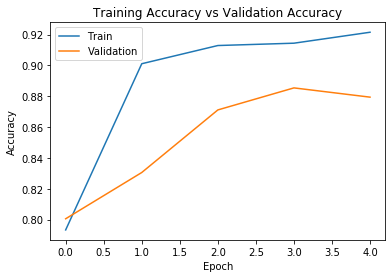

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

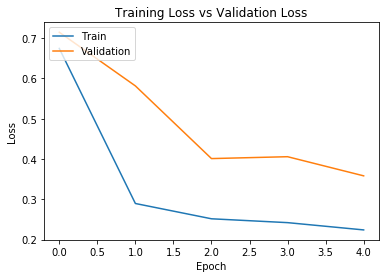

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Saving model

In [28]:
# save model and architecture to single file
import os
if not os.path.isdir('model_saved'):
    os.mkdir('model_saved')
    
model.save("model_saved/basic_model.h5")
print("Saved model to disk")

Saved model to disk


In [29]:
from keras.models import load_model

In [30]:
# load model
model_loaded = load_model('model_saved/basic_model.h5')

In [31]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [32]:
def get_letters(img, ):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [33]:
def get_word(letter):
    word = "".join(letter)
    return word

In [34]:
test_img_path = r'C:\Users\w20027087\Downloads\archive (1)\validation_v2\validation/VALIDATION_0154.jpg'

In [35]:
#letter,image = get_letters(test_img_path, model_loaded)
#word = get_word(letter)
#print(word)
#plt.imshow(image)

GEN0R0N


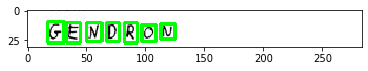

In [36]:
letter,image = get_letters(r"C:\Users\w20027087\Downloads\archive (1)\validation_v2\validation/VALIDATION_0154.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

IEC0MTE


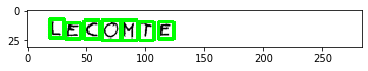

In [37]:
letter,image = get_letters(r"C:\Users\w20027087\Downloads\archive (1)\validation_v2\validation/VALIDATION_0350.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

IEHEBEL


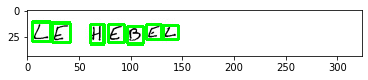

In [38]:
letter,image = get_letters(r"C:\Users\w20027087\Downloads\archive (1)\validation_v2\validation/VALIDATION_0264.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)